# Comparison of texture features calculated using CellProfiler 2.2 with texture features calculated using CellProfiler 3.0

Aim:
I noticed that I could classify different golgi phenotypes nicely using the `Texture_InfoMeas*` features calculated using the `MeasureTexture` module in CellProfiler V2.2 

When trying to replicate the same classification in CellProfiler 3.0 I could no longer distinguish the phenotypes using the Texture features.

Looking into the source code on github I can see that the calculation of Haralick features was changed to use the Mahotas library.

To verify whats going on I wanted to compare the features. To ensure that I have the same object numbers and segmentation results I created a test set with intensity images and their corresponding object segmentation (as label images).

I ran CP 2.2 and CP 3 on these images/objects, exporting the results as CSV. 

This worksheet plots measurements from the different versions against each other. 

While I would expect that the texture measurements might somehow be scaled slightly differently, the results I see is that they don't correlate much at all. 

While not shown here I also tried plotting different orientations against each other (the CP2.2 features have orientation angles in their name whereas the CP3 features have orienations numbered).


Dec 2017 Volker Hilsenstein 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read both tables with texture measurements

In [2]:
c22 = pd.read_csv("./c2_Cells.csv") # output from CP2.2 ExportToSpreadsheet
c3 = pd.read_csv("./c3_Cells.csv")  # output from CP3 ExportToSpreadsheet

In [3]:
# Ectract texture column names
cp2texinfocol = [c for c in  c22.columns if c.startswith("Texture_") ]
cp3texinfocol = [c for c in  c3.columns if c.startswith("Texture_") ]

In [4]:
cp3texinfocol

['Texture_AngularSecondMoment_intensity_3_00',
 'Texture_AngularSecondMoment_intensity_3_01',
 'Texture_AngularSecondMoment_intensity_3_02',
 'Texture_AngularSecondMoment_intensity_3_03',
 'Texture_Contrast_intensity_3_00',
 'Texture_Contrast_intensity_3_01',
 'Texture_Contrast_intensity_3_02',
 'Texture_Contrast_intensity_3_03',
 'Texture_Correlation_intensity_3_00',
 'Texture_Correlation_intensity_3_01',
 'Texture_Correlation_intensity_3_02',
 'Texture_Correlation_intensity_3_03',
 'Texture_DifferenceEntropy_intensity_3_00',
 'Texture_DifferenceEntropy_intensity_3_01',
 'Texture_DifferenceEntropy_intensity_3_02',
 'Texture_DifferenceEntropy_intensity_3_03',
 'Texture_DifferenceVariance_intensity_3_00',
 'Texture_DifferenceVariance_intensity_3_01',
 'Texture_DifferenceVariance_intensity_3_02',
 'Texture_DifferenceVariance_intensity_3_03',
 'Texture_Entropy_intensity_3_00',
 'Texture_Entropy_intensity_3_01',
 'Texture_Entropy_intensity_3_02',
 'Texture_Entropy_intensity_3_03',
 'Textur

In [5]:
cp2texinfocol

['Texture_AngularSecondMoment_intensity_3_0',
 'Texture_AngularSecondMoment_intensity_3_135',
 'Texture_AngularSecondMoment_intensity_3_45',
 'Texture_AngularSecondMoment_intensity_3_90',
 'Texture_Contrast_intensity_3_0',
 'Texture_Contrast_intensity_3_135',
 'Texture_Contrast_intensity_3_45',
 'Texture_Contrast_intensity_3_90',
 'Texture_Correlation_intensity_3_0',
 'Texture_Correlation_intensity_3_135',
 'Texture_Correlation_intensity_3_45',
 'Texture_Correlation_intensity_3_90',
 'Texture_DifferenceEntropy_intensity_3_0',
 'Texture_DifferenceEntropy_intensity_3_135',
 'Texture_DifferenceEntropy_intensity_3_45',
 'Texture_DifferenceEntropy_intensity_3_90',
 'Texture_DifferenceVariance_intensity_3_0',
 'Texture_DifferenceVariance_intensity_3_135',
 'Texture_DifferenceVariance_intensity_3_45',
 'Texture_DifferenceVariance_intensity_3_90',
 'Texture_Entropy_intensity_3_0',
 'Texture_Entropy_intensity_3_135',
 'Texture_Entropy_intensity_3_45',
 'Texture_Entropy_intensity_3_90',
 'Textur

# Sanity check, plot object locations against each other, just to see whether we are comparing the same objects

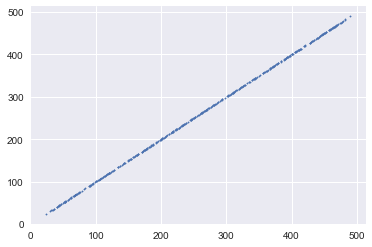

In [6]:
plt.scatter(c22['Location_Center_X'], c3['Location_Center_X'],s=2)

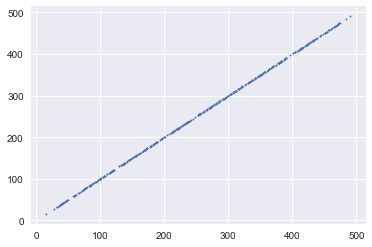

In [7]:
plt.scatter(c22['Location_Center_Y'], c3['Location_Center_Y'],s=2)

# Now let's plot various texture measurements against each other, these should be highly correlated if both versions calculate the same measurements

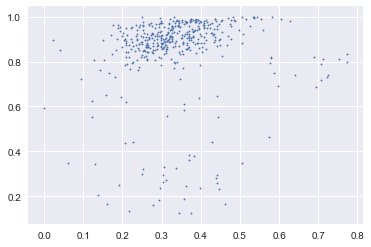

In [8]:
plt.scatter(c22['Texture_InfoMeas2_intensity_3_0'], c3['Texture_InfoMeas2_intensity_3_00'],s=2)

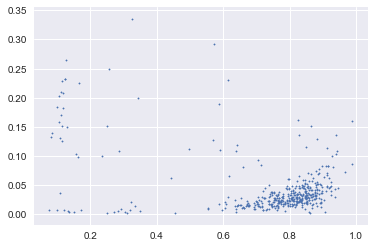

In [9]:
plt.scatter(c22['Texture_AngularSecondMoment_intensity_3_0'], c3['Texture_AngularSecondMoment_intensity_3_00'],s=2)

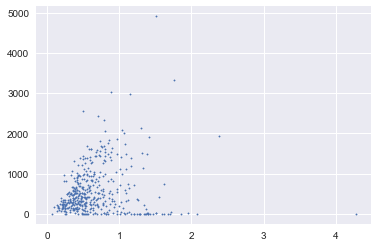

In [10]:
plt.scatter(c22['Texture_Contrast_intensity_3_0'], c3['Texture_Contrast_intensity_3_00'],s=2)

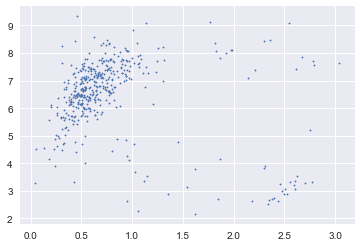

In [11]:
plt.scatter(c22['Texture_Entropy_intensity_3_0'], c3['Texture_Entropy_intensity_3_00'],s=2)

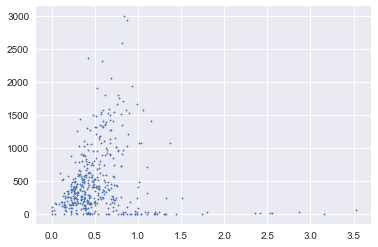

In [12]:
plt.scatter(c22['Texture_Variance_intensity_3_0'], c3['Texture_Variance_intensity_3_00'],s=2)

# Conclusion: something is wrong.